In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/usa_rain_prediction_dataset_2024_2025.xlsx')
data.head(), data.columns

(        Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
 0 2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
 1 2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
 2 2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
 3 2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
 4 2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   
 
    Cloud Cover     Pressure  Water Level In Rivers   Rain Tomorrow  Flood Risk  
 0    69.617966  1026.030278                    4.37              0           0  
 1    41.606048   995.962065                    5.56              0           0  
 2    77.364763   980.796739                    7.59              1           1  
 3    52.541196   979.012163                    6.39              0           0  
 4    85.584000  1031.790859                    2.40              0           0  ,
 Index(['Date', 'Location', 'Temperat

In [ ]:
n_data = data.select_dtypes(include=['number'])
n_data.corr()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Water Level In Rivers,Rain Tomorrow,Flood Risk
Temperature,1.000000,0.023338,-0.016884,0.042218,-0.024823,0.009425,0.001214,0.031062,0.016797
Humidity,0.023338,1.000000,0.000153,-0.028133,-0.010711,0.025058,-0.014599,0.453561,0.270660
Wind Speed,-0.016884,0.000153,1.000000,-0.012201,0.024978,0.040574,-0.016463,-0.015886,-0.018710
Precipitation,0.042218,-0.028133,-0.012201,1.000000,-0.016724,0.026328,0.017962,0.478934,0.251022
Cloud Cover,-0.024823,-0.010711,0.024978,-0.016724,1.000000,0.026250,-0.031559,-0.015235,-0.007061
Pressure,0.009425,0.025058,0.040574,0.026328,0.026250,1.000000,-0.004837,0.011930,0.009536
Water Level In Rivers,0.001214,-0.014599,-0.016463,0.017962,-0.031559,-0.004837,1.000000,0.010184,0.346086
Rain Tomorrow,0.031062,0.453561,-0.015886,0.478934,-0.015235,0.011930,0.010184,1.000000,0.579471
Flood Risk,0.016797,0.270660,-0.018710,0.251022,-0.007061,0.009536,0.346086,0.579471,1.000000


                        Temperature  Humidity  Wind Speed  Precipitation  \
Temperature                1.000000  0.023338   -0.016884       0.042218   
Humidity                   0.023338  1.000000    0.000153      -0.028133   
Wind Speed                -0.016884  0.000153    1.000000      -0.012201   
Precipitation              0.042218 -0.028133   -0.012201       1.000000   
Cloud Cover               -0.024823 -0.010711    0.024978      -0.016724   
Pressure                   0.009425  0.025058    0.040574       0.026328   
Water Level In Rivers      0.001214 -0.014599   -0.016463       0.017962   
Rain Tomorrow              0.031062  0.453561   -0.015886       0.478934   
Flood Risk                 0.016797  0.270660   -0.018710       0.251022   

                        Cloud Cover  Pressure  Water Level In Rivers   \
Temperature               -0.024823  0.009425                0.001214   
Humidity                  -0.010711  0.025058               -0.014599   
Wind Speed          

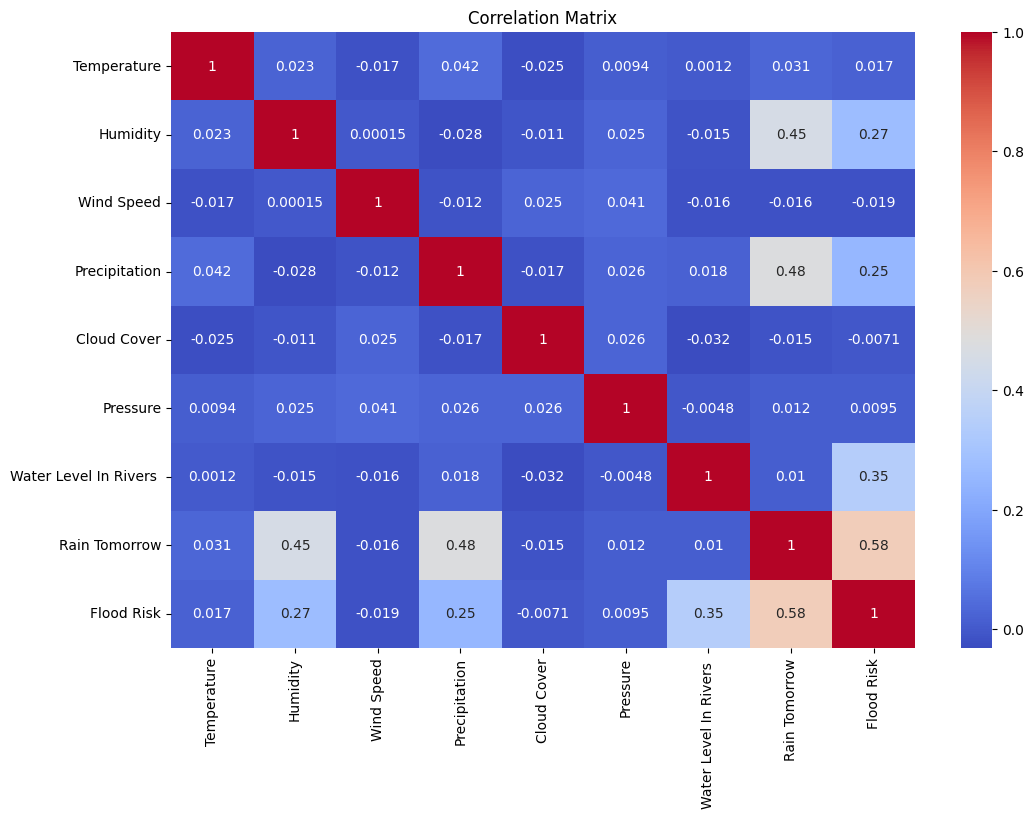

In [ ]:
correlation_matrix = n_data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(data.columns)

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Water Level In Rivers ',
       'Rain Tomorrow', 'Flood Risk'],
      dtype='object')


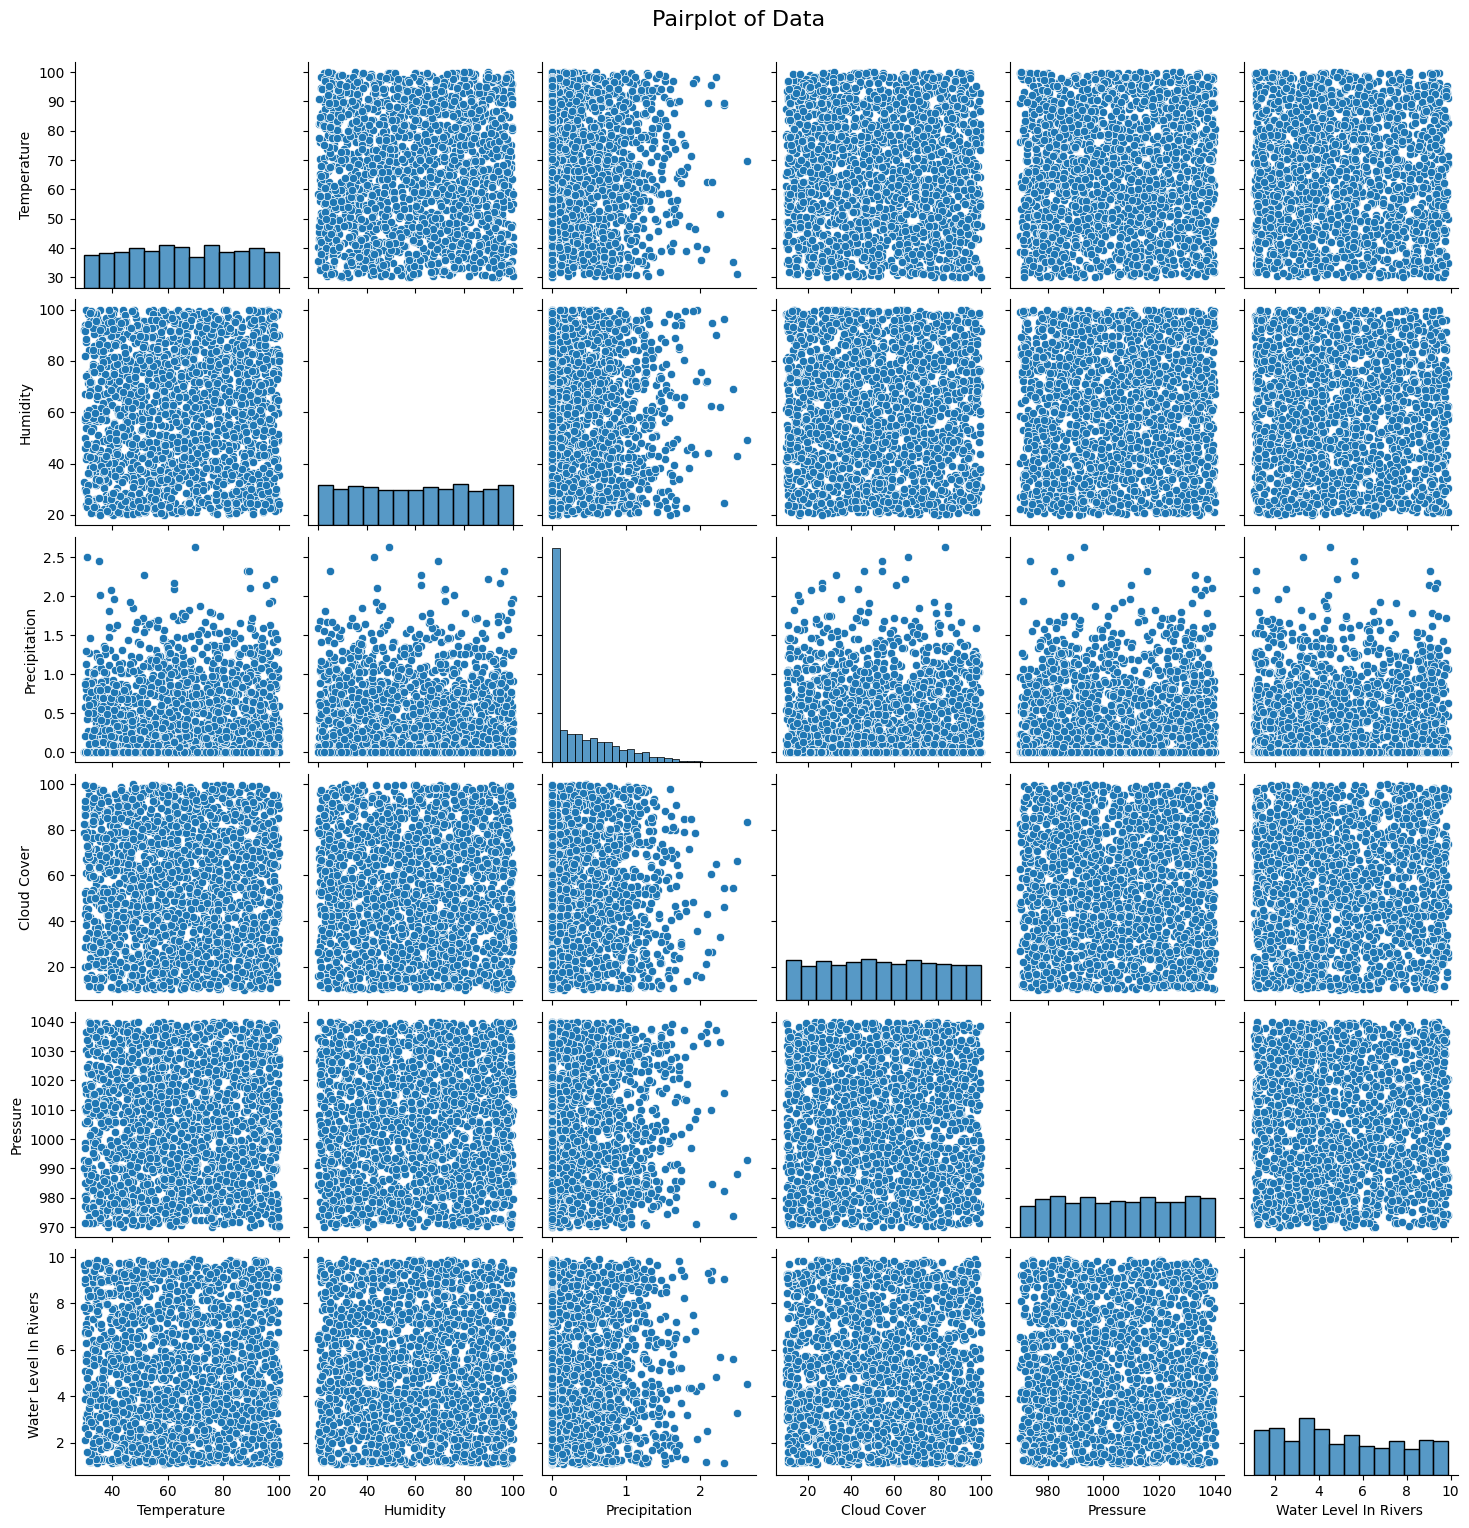

In [ ]:
sns.pairplot(data[['Temperature', 'Humidity', 'Precipitation', 'Cloud Cover', 'Pressure', 'Water Level In Rivers ']])
plt.suptitle('Pairplot of Data', y=1.02, fontsize=16)
plt.show()

In [ ]:
print(data.isnull().sum())
data = data.dropna()
print(data.dtypes)


Date                      0
Location                  0
Temperature               0
Humidity                  0
Wind Speed                0
Precipitation             0
Cloud Cover               0
Pressure                  0
Water Level In Rivers     0
Rain Tomorrow             0
Flood Risk                0
dtype: int64
Date                      datetime64[ns]
Location                          object
Temperature                      float64
Humidity                         float64
Wind Speed                       float64
Precipitation                    float64
Cloud Cover                      float64
Pressure                         float64
Water Level In Rivers            float64
Rain Tomorrow                      int64
Flood Risk                         int64
dtype: object


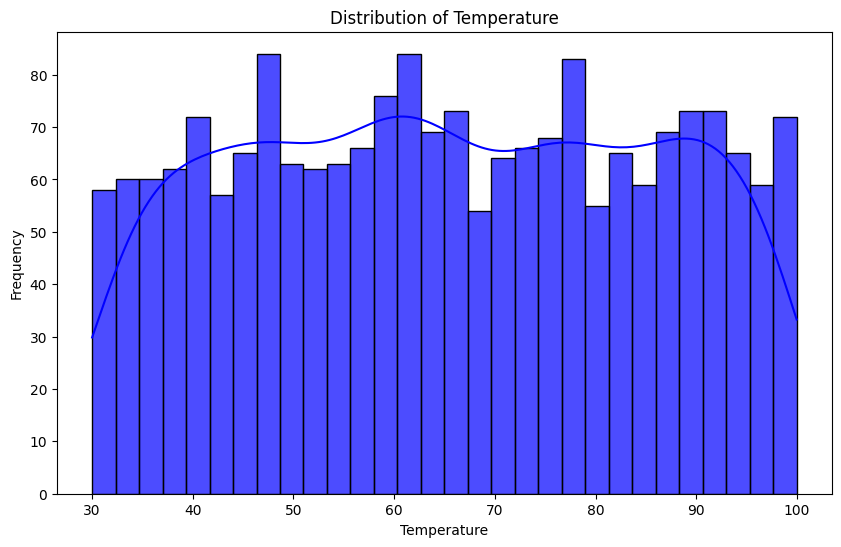

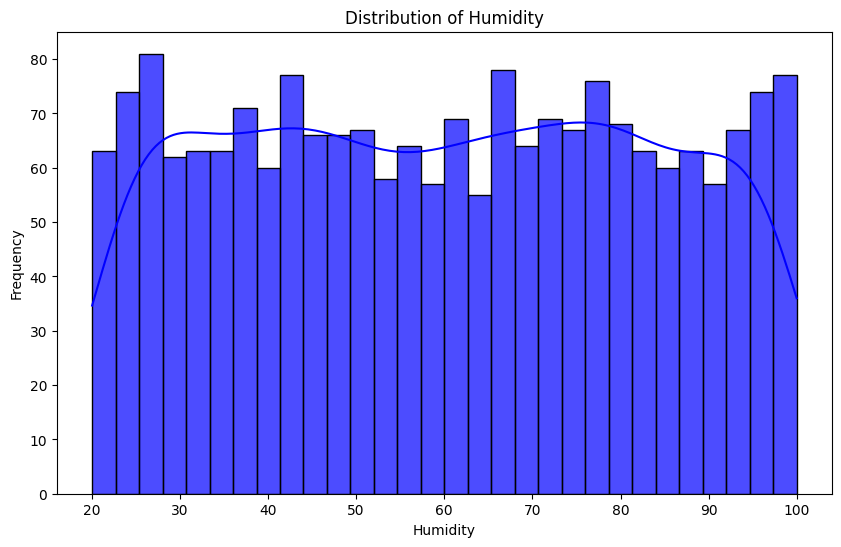

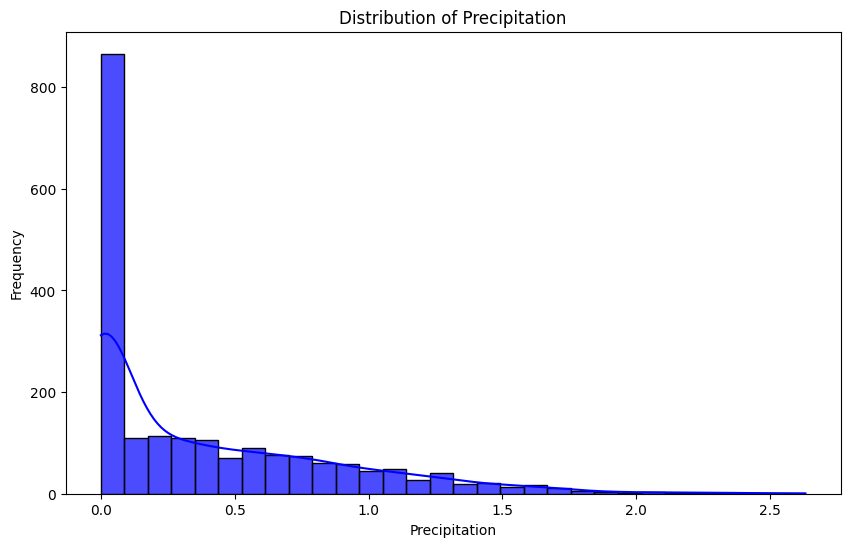

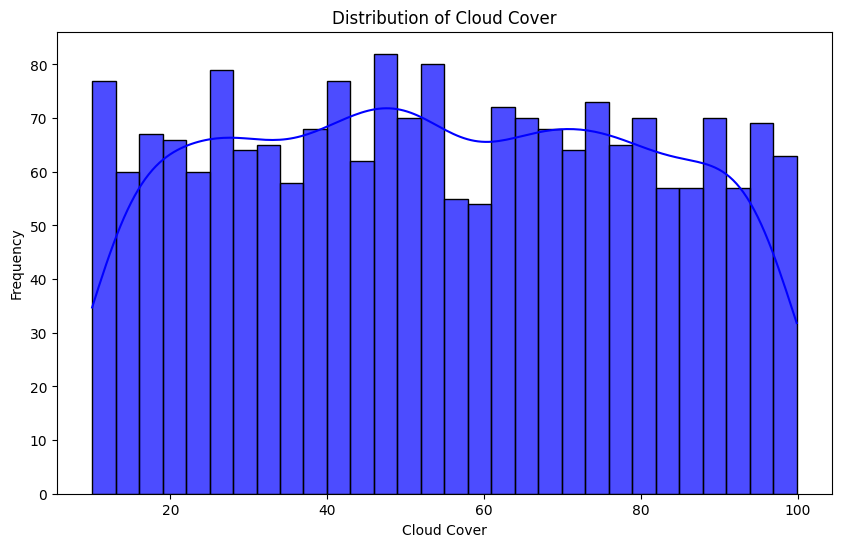

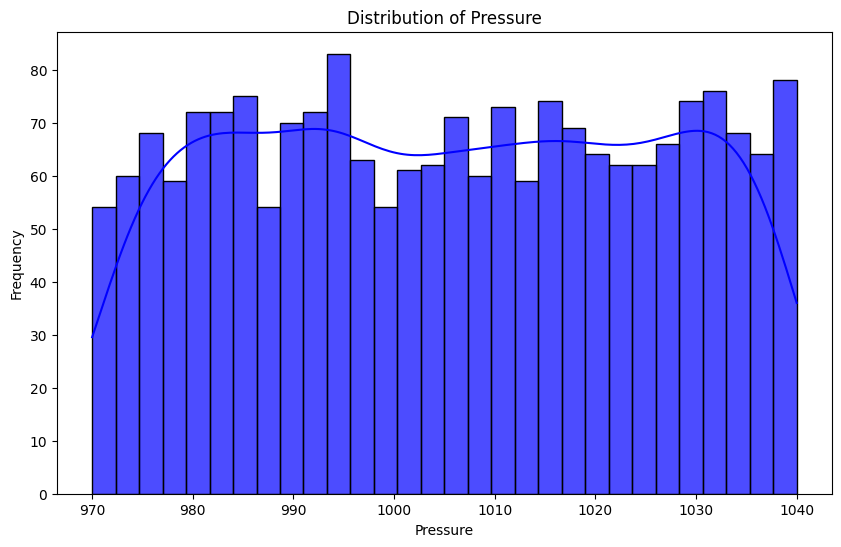

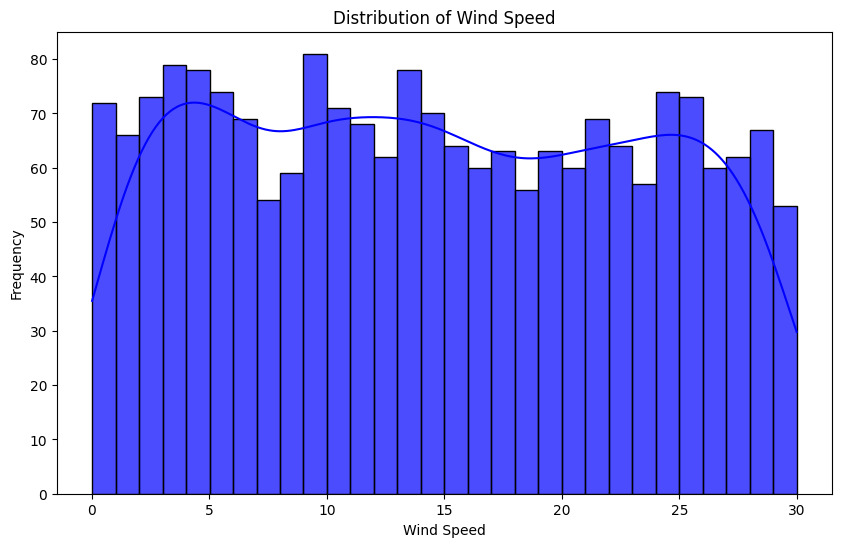

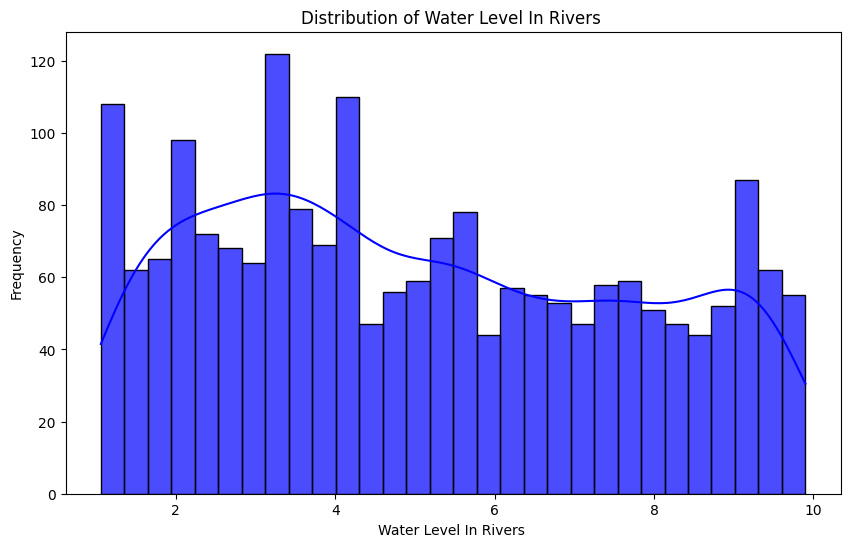

Statistical Metrics for Features:
                               Mean       Median    Std Dev         Min  \
Temperature               65.367739    64.957918  19.941647   30.011057   
Humidity                  59.982964    60.237193  23.330610   20.062966   
Precipitation              0.383256     0.190970   0.475657    0.000000   
Cloud Cover               54.407878    53.488818  25.742623   10.033621   
Pressure                1005.536506  1005.416528  20.231915  970.002299   
Wind Speed                14.583172    14.227640   8.667555    0.012273   
Water Level In Rivers      5.095878     4.810000   2.578805    1.060000   

                                Max        IQR  
Temperature               99.965298  34.362461  
Humidity                  99.970892  39.904627  
Precipitation              2.631709   0.653137  
Cloud Cover               99.860110  44.073329  
Pressure                1039.988627  35.129732  
Wind Speed                29.995994  15.341552  
Water Level In Rivers 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограммы и плотности вероятности для каждой переменной
features = ['Temperature', 'Humidity', 'Precipitation', 'Cloud Cover', 'Pressure', 'Wind Speed', 'Water Level In Rivers ']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Рассчет статистических метрик
stats = data[features].describe().T
stats['IQR'] = stats['75%'] - stats['25%']  # Межквартильный размах
stats = stats[['mean', '50%', 'std', 'min', 'max', 'IQR']]
stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'IQR']

# Выводим таблицу с метриками
print("Statistical Metrics for Features:")
print(stats)


In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Temperature', 'Humidity', 'Precipitation', 'Cloud Cover', 'Pressure', 'Wind Speed', 'Water Level In Rivers ']]

# Зависимые переменные (например, Rain Tomorrow)
y_rain = data['Rain Tomorrow']  # Для предсказания дождя
y_flood = data['Flood Risk']    # Для оценки риска наводнения

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train_rain, y_test_rain = train_test_split(X, y_rain, test_size=0.2, random_state=42)
X_train, X_test, y_train_flood, y_test_flood = train_test_split(X, y_flood, test_size=0.2, random_state=42)

# Линейная регрессия

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Создаем модель
model_rain = LinearRegression()

# Обучаем модель
model_rain.fit(X_train, y_train_rain)

# Делаем предсказания
y_pred_rain = model_rain.predict(X_test)

# Оцениваем модель
mse_rain = mean_squared_error(y_test_rain, y_pred_rain)
r2_rain = r2_score(y_test_rain, y_pred_rain)

print(f"Rain Tomorrow - Mean Squared Error: {mse_rain}, R2 Score: {r2_rain}")


Rain Tomorrow - Mean Squared Error: 0.07795443389544837, R2 Score: 0.4660426635013596


In [ ]:
# Создаем модель
model_flood = LinearRegression()

# Обучаем модель
model_flood.fit(X_train, y_train_flood)

# Делаем предсказания
y_pred_flood = model_flood.predict(X_test)

# Оцениваем модель
mse_flood = mean_squared_error(y_test_flood, y_pred_flood)
r2_flood = r2_score(y_test_flood, y_pred_flood)

print(f"Flood Risk - Mean Squared Error: {mse_flood}, R2 Score: {r2_flood}")

Flood Risk - Mean Squared Error: 0.050528047058490164, R2 Score: 0.27166779014788944


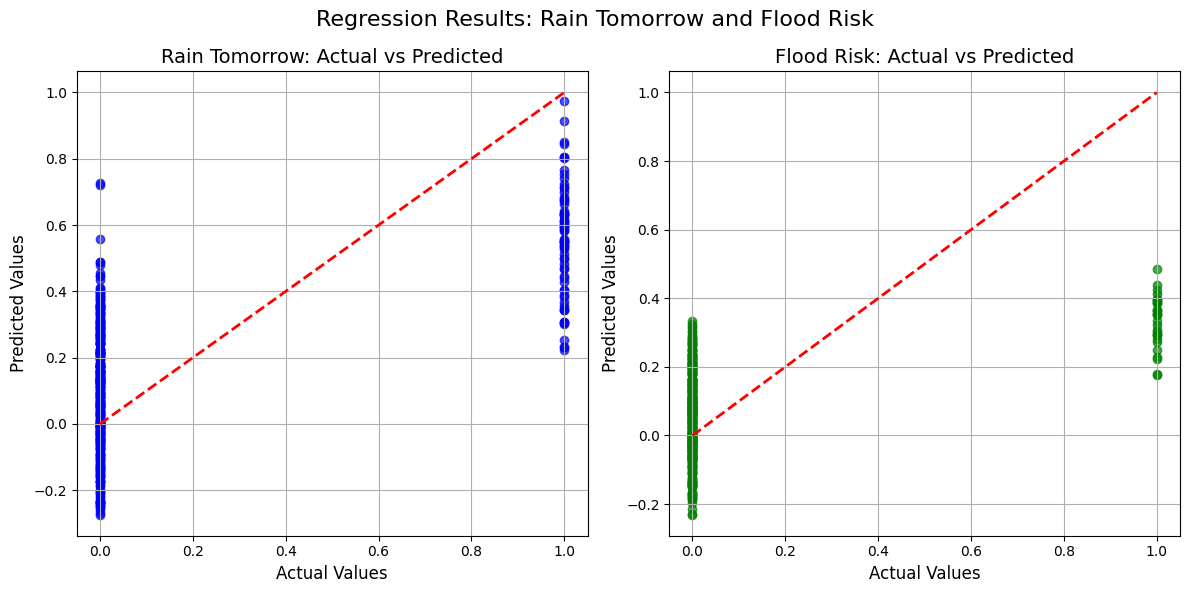

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# График для 'Rain Tomorrow'
plt.figure(figsize=(12, 6))

# Сравнение предсказанных и реальных значений для Rain Tomorrow
plt.subplot(1, 2, 1)
plt.scatter(y_test_rain, y_pred_rain, alpha=0.7, color='blue')
plt.plot([y_test_rain.min(), y_test_rain.max()], [y_test_rain.min(), y_test_rain.max()], '--r', linewidth=2)
plt.title('Rain Tomorrow: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid()

# График для 'Flood Risk'
plt.subplot(1, 2, 2)
plt.scatter(y_test_flood, y_pred_flood, alpha=0.7, color='green')
plt.plot([y_test_flood.min(), y_test_flood.max()], [y_test_flood.min(), y_test_flood.max()], '--r', linewidth=2)
plt.title('Flood Risk: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid()

# Общий заголовок
plt.suptitle('Regression Results: Rain Tomorrow and Flood Risk', fontsize=16)
plt.tight_layout()
plt.show()


# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем модель логистической регрессии
model_rain = LogisticRegression()

# Обучаем модель
model_rain.fit(X_train, y_train_rain)

# Делаем предсказания
y_pred_rain = model_rain.predict(X_test)

# Оцениваем модель
accuracy_rain = accuracy_score(y_test_rain, y_pred_rain)
conf_matrix_rain = confusion_matrix(y_test_rain, y_pred_rain)
class_report_rain = classification_report(y_test_rain, y_pred_rain)

print(f"Accuracy for Rain Tomorrow: {accuracy_rain}")
print("Confusion Matrix for Rain Tomorrow:")
print(conf_matrix_rain)
print("Classification Report for Rain Tomorrow:")
print(class_report_rain)


Accuracy for Rain Tomorrow: 0.935
Confusion Matrix for Rain Tomorrow:
[[324   5]
 [ 21  50]]
Classification Report for Rain Tomorrow:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       329
           1       0.91      0.70      0.79        71

    accuracy                           0.94       400
   macro avg       0.92      0.84      0.88       400
weighted avg       0.93      0.94      0.93       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем модель логистической регрессии для Flood Risk
model_flood = LogisticRegression()

# Обучаем модель
model_flood.fit(X_train, y_train_flood)

# Делаем предсказания
y_pred_flood = model_flood.predict(X_test)

# Оцениваем модель
accuracy_flood = accuracy_score(y_test_flood, y_pred_flood)
conf_matrix_flood = confusion_matrix(y_test_flood, y_pred_flood)
class_report_flood = classification_report(y_test_flood, y_pred_flood)

print(f"Accuracy for Flood Risk: {accuracy_flood}")
print("Confusion Matrix for Flood Risk:")
print(conf_matrix_flood)
print("Classification Report for Flood Risk:")
print(class_report_flood)



Accuracy for Flood Risk: 0.965
Confusion Matrix for Flood Risk:
[[367   3]
 [ 11  19]]
Classification Report for Flood Risk:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       370
           1       0.86      0.63      0.73        30

    accuracy                           0.96       400
   macro avg       0.92      0.81      0.86       400
weighted avg       0.96      0.96      0.96       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


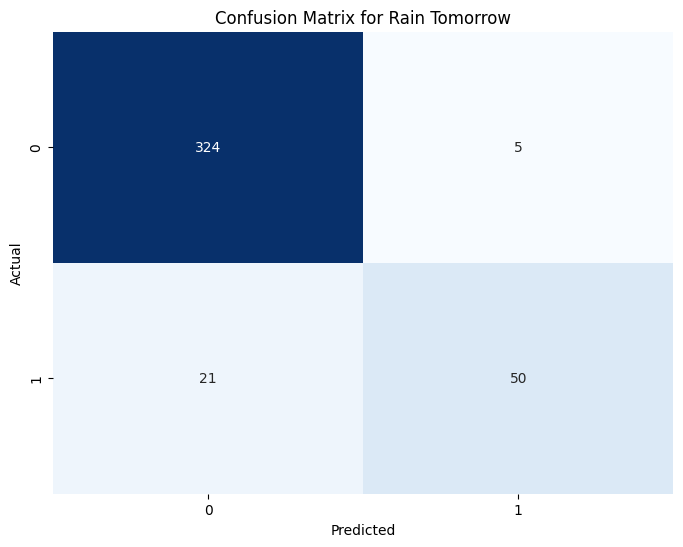

<ipython-input-24-67aac4631e10>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette='viridis')


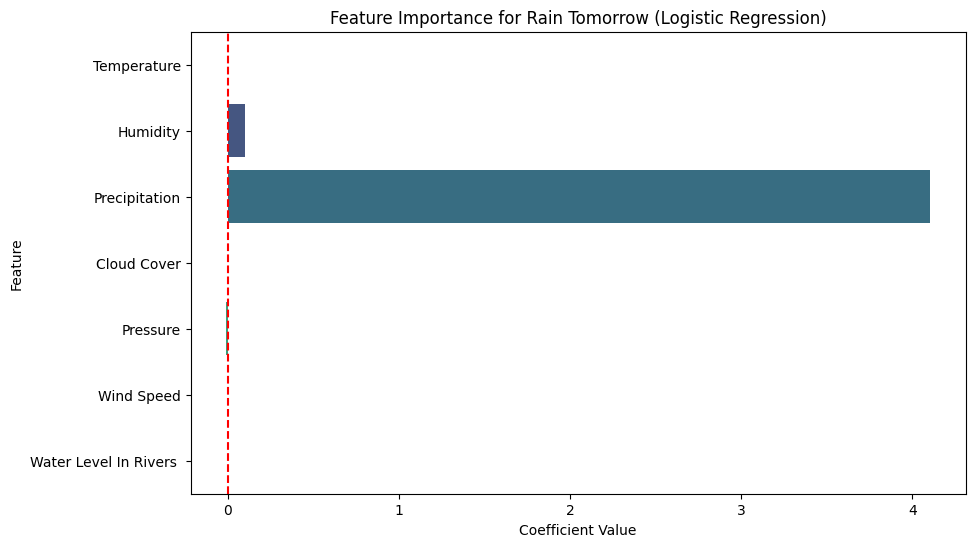

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rain, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Rain Tomorrow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация коэффициентов модели
coefficients = model_rain.coef_[0]  # Коэффициенты модели
features = X.columns  # Имена переменных
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette='viridis')
plt.title('Feature Importance for Rain Tomorrow (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')
plt.show()


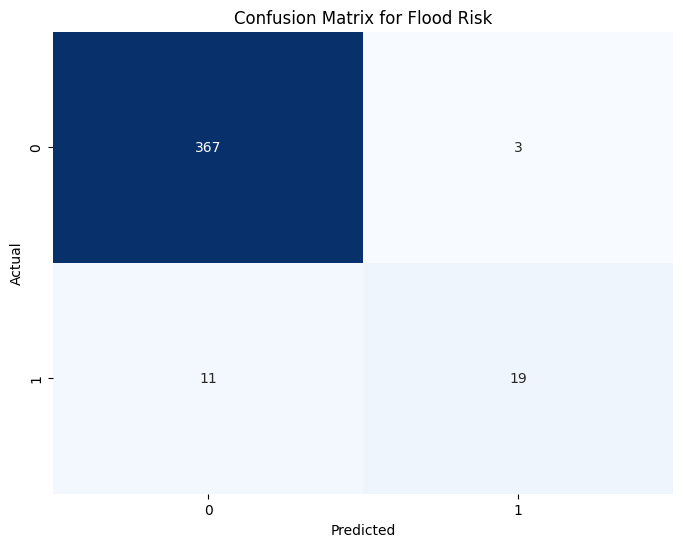

<ipython-input-39-cacaa45a7def>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_flood, y=features_flood, palette='viridis')


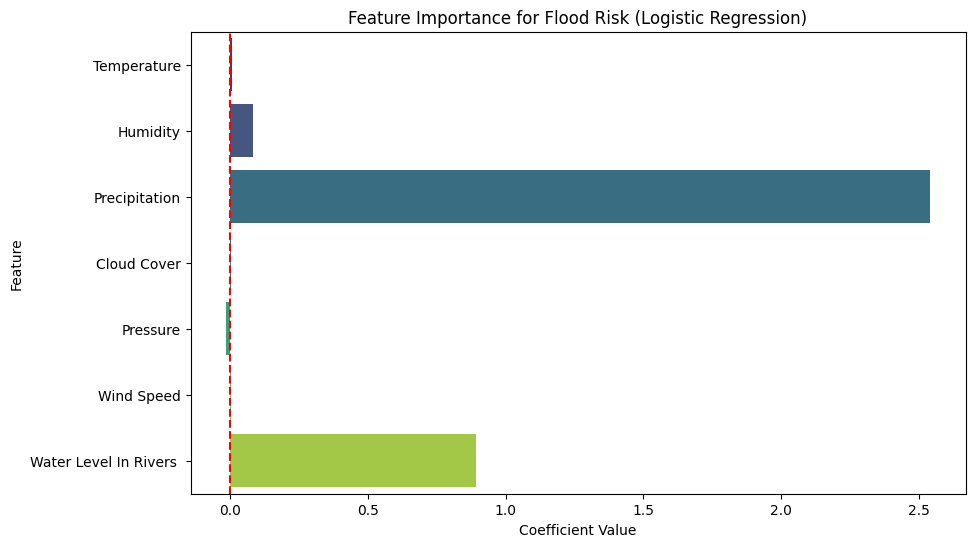

In [ ]:
# Визуализация матрицы ошибок для Flood Risk
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_flood, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Flood Risk')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация коэффициентов модели для Flood Risk
coefficients_flood = model_flood.coef_[0]  # Коэффициенты модели для наводнения
features_flood = X_train.columns  # Используем те же признаки, что и для обучения модели
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_flood, y=features_flood, palette='viridis')
plt.title('Feature Importance for Flood Risk (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='red', linestyle='--')
plt.show()


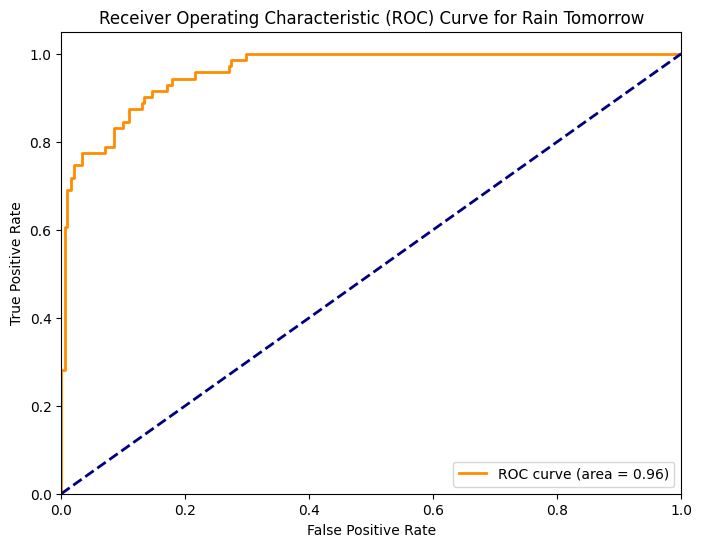

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии
model_rain = LogisticRegression()

# Стандартизируем данные (для обучения и теста)
scaler = StandardScaler()

# Стандартизируем обучающие данные
X_train_scaled = scaler.fit_transform(X_train[['Humidity', 'Precipitation']])

# Обучаем модель
model_rain.fit(X_train_scaled, y_train_rain)

# Стандартизируем тестовые данные
X_test_scaled = scaler.transform(X_test[['Humidity', 'Precipitation']])

# Получаем вероятности для классификации
y_pred_prob_rain = model_rain.predict_proba(X_test_scaled)[:, 1]

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test_rain, y_pred_prob_rain)
roc_auc = auc(fpr, tpr)

# Визуализируем ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Rain Tomorrow')
plt.legend(loc='lower right')
plt.show()

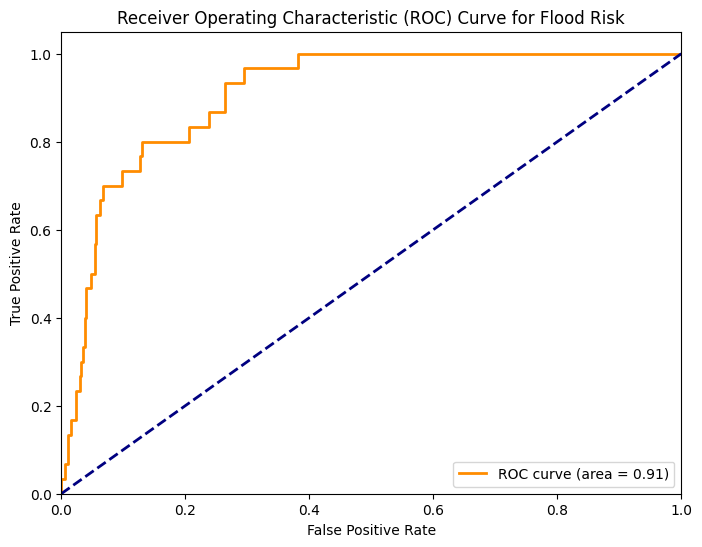

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии для предсказания наводнения
model_flood = LogisticRegression()

# Стандартизируем данные (для обучения и теста)
scaler = StandardScaler()

# Стандартизируем обучающие данные
X_train_scaled_flood = scaler.fit_transform(X_train[['Humidity', 'Precipitation']])

# Обучаем модель для предсказания Flood Risk
model_flood.fit(X_train_scaled_flood, y_train_flood)

# Стандартизируем тестовые данные
X_test_scaled_flood = scaler.transform(X_test[['Humidity', 'Precipitation']])

# Получаем вероятности для классификации Flood Risk
y_pred_prob_flood = model_flood.predict_proba(X_test_scaled_flood)[:, 1]

# Строим ROC-кривую для Flood Risk
fpr_flood, tpr_flood, thresholds_flood = roc_curve(y_test_flood, y_pred_prob_flood)
roc_auc_flood = auc(fpr_flood, tpr_flood)

# Визуализируем ROC-кривую для Flood Risk
plt.figure(figsize=(8, 6))
plt.plot(fpr_flood, tpr_flood, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_flood)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Flood Risk')
plt.legend(loc='lower right')
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Создание модели KNN
knn_rain = KNeighborsClassifier(n_neighbors=5)  # Выбираем k=5 для начала

# Обучение модели
knn_rain.fit(X_train, y_train_rain)

# Прогнозирование
y_pred_rain = knn_rain.predict(X_test)

# Оценка модели
accuracy_rain = accuracy_score(y_test_rain, y_pred_rain)
conf_matrix_rain = confusion_matrix(y_test_rain, y_pred_rain)
class_report_rain = classification_report(y_test_rain, y_pred_rain)

print(f"Accuracy for Rain Tomorrow: {accuracy_rain}")
print("Confusion Matrix for Rain Tomorrow:")
print(conf_matrix_rain)
print("Classification Report for Rain Tomorrow:")
print(class_report_rain)


Accuracy for Rain Tomorrow: 0.775
Confusion Matrix for Rain Tomorrow:
[[286  43]
 [ 47  24]]
Classification Report for Rain Tomorrow:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       329
           1       0.36      0.34      0.35        71

    accuracy                           0.78       400
   macro avg       0.61      0.60      0.61       400
weighted avg       0.77      0.78      0.77       400



In [ ]:
# Создание модели KNN для Flood Risk
knn_flood = KNeighborsClassifier(n_neighbors=5)  # Выбираем k=5 для начала

# Обучение модели
knn_flood.fit(X_train, y_train_flood)

# Прогнозирование
y_pred_flood = knn_flood.predict(X_test)

# Оценка модели
accuracy_flood = accuracy_score(y_test_flood, y_pred_flood)
conf_matrix_flood = confusion_matrix(y_test_flood, y_pred_flood)
class_report_flood = classification_report(y_test_flood, y_pred_flood)

print(f"Accuracy for Flood Risk: {accuracy_flood}")
print("Confusion Matrix for Flood Risk:")
print(conf_matrix_flood)
print("Classification Report for Flood Risk:")
print(class_report_flood)


Accuracy for Flood Risk: 0.91
Confusion Matrix for Flood Risk:
[[364   6]
 [ 30   0]]
Classification Report for Flood Risk:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       370
           1       0.00      0.00      0.00        30

    accuracy                           0.91       400
   macro avg       0.46      0.49      0.48       400
weighted avg       0.85      0.91      0.88       400



# Нейронные сети

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Создание модели нейронной сети для Rain Tomorrow
model_rain = Sequential()

# Входной слой
model_rain.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Скрытые слои
model_rain.add(Dense(units=32, activation='relu'))
model_rain.add(Dense(units=16, activation='relu'))

# Выходной слой (один нейрон для бинарной классификации)
model_rain.add(Dense(units=1, activation='sigmoid'))

# Компиляция модели
model_rain.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history_rain = model_rain.fit(X_train, y_train_rain, epochs=20, batch_size=32, validation_data=(X_test, y_test_rain))

# Прогнозирование
y_pred_rain = (model_rain.predict(X_test) > 0.5).astype(int)

# Оценка модели
accuracy_rain = accuracy_score(y_test_rain, y_pred_rain)
conf_matrix_rain = confusion_matrix(y_test_rain, y_pred_rain)
class_report_rain = classification_report(y_test_rain, y_pred_rain)

print(f"Accuracy for Rain Tomorrow (NN): {accuracy_rain}")
print("Confusion Matrix for Rain Tomorrow:")
print(conf_matrix_rain)
print("Classification Report for Rain Tomorrow:")
print(class_report_rain)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5885 - loss: 10.9888 - val_accuracy: 0.7575 - val_loss: 0.5692
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6539 - loss: 0.8480 - val_accuracy: 0.8050 - val_loss: 0.5330
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7389 - loss: 0.6356 - val_accuracy: 0.8100 - val_loss: 0.4161
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.5431 - val_accuracy: 0.8175 - val_loss: 0.4471
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.4651 - val_accuracy: 0.7750 - val_loss: 0.4267
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7304 - loss: 0.5749 - val_accuracy: 0.8150 - val_loss: 0.3590
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4642 - val_accuracy: 0.7550 - val_loss: 0.4544
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.4432 - val_accuracy: 0.8150 - val_los

In [ ]:
# Создание модели нейронной сети для Flood Risk
model_flood = Sequential()

# Входной слой
model_flood.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Скрытые слои
model_flood.add(Dense(units=32, activation='relu'))
model_flood.add(Dense(units=16, activation='relu'))

# Выходной слой (один нейрон для бинарной классификации)
model_flood.add(Dense(units=1, activation='sigmoid'))

# Компиляция модели
model_flood.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history_flood = model_flood.fit(X_train, y_train_flood, epochs=20, batch_size=32, validation_data=(X_test, y_test_flood))

# Прогнозирование
y_pred_flood = (model_flood.predict(X_test) > 0.5).astype(int)

# Оценка модели
accuracy_flood = accuracy_score(y_test_flood, y_pred_flood)
conf_matrix_flood = confusion_matrix(y_test_flood, y_pred_flood)
class_report_flood = classification_report(y_test_flood, y_pred_flood)

print(f"Accuracy for Flood Risk (NN): {accuracy_flood}")
print("Confusion Matrix for Flood Risk:")
print(conf_matrix_flood)
print("Classification Report for Flood Risk:")
print(class_report_flood)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7700 - loss: 6.4394 - val_accuracy: 0.7600 - val_loss: 0.7187
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.6525 - val_accuracy: 0.9225 - val_loss: 0.4688
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8826 - loss: 0.5066 - val_accuracy: 0.8400 - val_loss: 0.3852
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.3980 - val_accuracy: 0.8875 - val_loss: 0.2914
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8822 - loss: 0.3992 - val_accuracy: 0.9200 - val_loss: 0.2735
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8743 - loss: 0.4207 - val_accuracy: 0.9250 - val_loss: 0.2650
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8932 - loss: 0.3305 - val_accuracy: 0.8050 - val_loss: 0.4135
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3137 - val_accuracy: 0.8850 - val_loss: 0.2549
Epo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
